In [349]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime

In [2]:
file=r'C:\Users\along\Documents\2) Coding\Python\Data Science\Machine Learning\ML-For-Beginners-Fork1\2-Regression\data\US-pumpkins.csv'

In [323]:
df=pd.read_csv(file)

In [373]:
df2=pd.read_csv(file)

In [324]:
df.shape

(1757, 26)

In [365]:
df['Date']=df['Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y'))

TypeError: strptime() argument 1 must be str, not Timestamp

In [360]:
df.dtypes

City Name                  object
Type                       object
Package                    object
Variety                    object
Sub Variety                object
Date               datetime64[ns]
Low Price                 float64
High Price                float64
Mostly Low                float64
Mostly High               float64
Origin                     object
Origin District            object
Item Size                  object
Color                      object
Unit of Sale               object
Repack                     object
Unnamed: 25                object
Size of Package            object
Type of Package            object
AveragePrice              float64
dtype: object

In [325]:
#kalau nak isi nan kene pakai fillna
df['Type']=df["Type"].fillna('Non Organic')

In [326]:
df['Sub Variety'].unique()

array([nan, 'FLAT TYPE', 'ROUND TYPE'], dtype=object)

In [105]:
df.isna().sum()

City Name             0
Type                  0
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [327]:
Empty_columns=[n for n in df.columns if df[n].isna().sum()==1757]

In [328]:
df=df.drop(columns=Empty_columns)

#### Splitting the column to detect the number in the column

In [189]:
x=df["Package"].str.rsplit(' ',expand=True,n=-1)
x

,0,1,2,3
0,24,inch,bins,None
1,24,inch,bins,None
2,24,inch,bins,None
3,24,inch,bins,None
4,24,inch,bins,None
...,...,...,...,...
1752,22,lb,cartons,None
1753,36,inch,bins,None
1754,36,inch,bins,None
1755,36,inch,bins,None


#### Using regex to identify the type of size in the column 

In [342]:
c=df['Package'].str.extract(r'(1 1/9)|(\S+)')
d=df['Package'].str.extract(r'(\b[i,l,b]\S*)')

In [330]:
c[0]=c[0].fillna(c[1])

In [331]:
df['Package'].unique()

array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

In [338]:
df['Size of Package'].unique()

array(['24', '36', '50', '1 1/9', '1/2', 1.0, '35', '20', '40', '22'],
      dtype=object)

In [337]:
# if you are changing multiple features with condition, use this method using map function

package_correction= {'bushel':1, 'bins':1, 'each':1}
df['Size of Package']=df['Size of Package'].map(package_correction).fillna(c[0])

In [333]:
df['Size of Package']=c[0]



In [344]:
df['Type of Package']=d

In [346]:
df['AveragePrice']=(df['High Price']+df['Low Price'])/2

<AxesSubplot:xlabel='Date'>

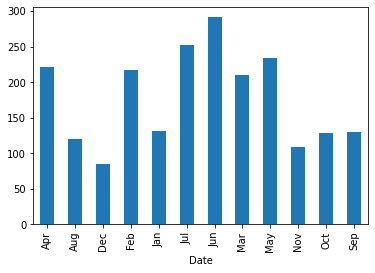

In [384]:
df.groupby(['Date'])['AveragePrice'].mean().plot(kind='bar')


In [368]:
df['Date']=df['Date'].apply(lambda x:x.strftime('%b'))


AttributeError: 'str' object has no attribute 'strftime'